K-Means clustering for IP addresses in a network

In [221]:
#importing the required files for the implementation

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cdist

getting the dataset of IP addresses for clustering

In [223]:
# Specify the path to the random_ip_address .csv file
csv_file_path = "filtered_data.csv"

# Read the CSV file into a pandas Data frame
df = pd.read_csv(csv_file_path)

In [224]:
#display the dataset using data frame df
df

,IP Address,x,y,z,extra
0,152.174.74.159,152.0,174.0,74.0,159.0
1,176.41.145.221,176.0,41.0,145.0,221.0
2,205.33.230.180,205.0,33.0,230.0,180.0
3,34.74.173.159,34.0,74.0,173.0,159.0
4,244.125.152.220,244.0,125.0,152.0,220.0
...,...,...,...,...,...
95,102.255.148.139,102.0,255.0,148.0,139.0
96,2.224.27.40,2.0,224.0,27.0,40.0
97,246.198.81.102,246.0,198.0,81.0,102.0
98,20.158.102.161,20.0,158.0,102.0,161.0


In [225]:
# check for missing values in the dataframe and clean the data
df.dropna(inplace=True)

In [226]:
df.describe()

,x,y,z,extra
count,100.000000,100.000000,100.000000,100.000000
mean,124.610000,127.750000,138.400000,129.190000
std,73.677141,73.988994,75.915956,72.463951
min,2.000000,1.000000,5.000000,0.000000
25%,60.750000,63.000000,77.750000,69.500000
50%,122.000000,135.500000,148.500000,132.500000
75%,184.750000,192.250000,202.250000,187.750000
max,253.000000,255.000000,255.000000,251.000000


No missing values in dataset

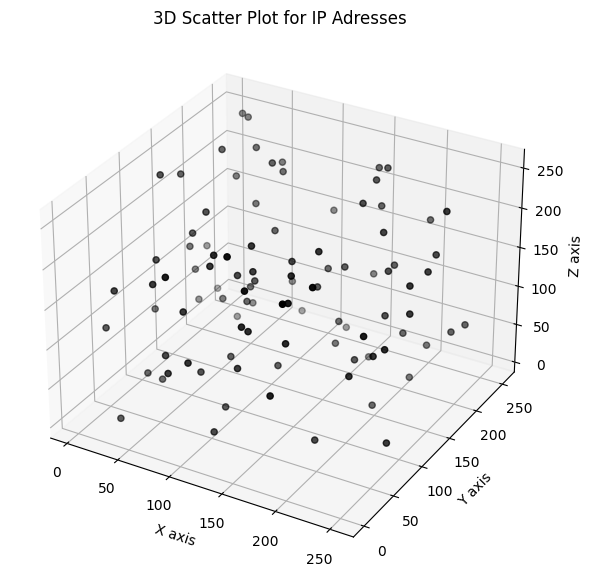

In [227]:
# Plotting the IP Addresses on the 3-D plot

# data from the columns are the actual x, y, z coordinates of the IP Addresses
x = df['x']  
y = df['y']  
z = df['z']  

# Create a 3D plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the coordinates from the dataframe 'df'
ax.scatter(x, y, z, c='black', marker='o')

# Setting x,y and z axis labels and title for the plot
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Scatter Plot for IP Adresses')

plt.show()


Identifying the optimal number of clusters required:

Clusters must be experimented multiple times for multiple values to check which fits the dataset best. After a specific number of alterations, the difference in the cluster means becomes negligible. This is the equilibrium state for the current k-value cluster.

In [228]:
def elbow_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = 10)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    # Generating the elbow plot to visualize the slope of clusters vs inertia
    fig = plt.subplots(figsize=(7, 4))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of clusters (value of k)')
    plt.ylabel('Inertia (Difference of distance from mean of pts.)')
    plt.grid(True)
    plt.show()
    
        

Using the values of first, second and third octet from the dataset of IP Addresses, we can plot the (x,y,z) coordinates of IP Addresses in a 3-D space and check for optimal k means clustering values

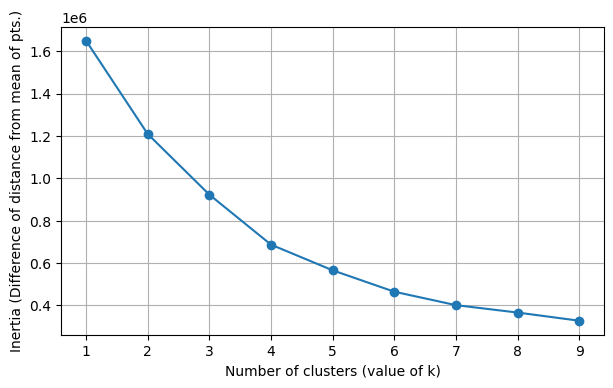

In [229]:
elbow_k_means(df[['x', 'y', 'z']], 10)

We can see from the plot that the slope starts decreasing gradually from k = 2 and an even more gradual and longer descent at k = 4

Applying K Means Clustring to IP Addresses : 

In [230]:
# For K-Means value of k = 2
kmeans = KMeans(n_clusters = 2, n_init = 10)

In [231]:
kmeans.fit(df[['x', 'y']])

KMeans(n_clusters=2, n_init=10)

Creating a new column to assign cluster number to all IP Addresses : 

In [232]:
df['k-means for k = 2'] = kmeans.labels_

In [233]:
df

,IP Address,x,y,z,extra,k-means for k = 2
0,152.174.74.159,152.0,174.0,74.0,159.0,0
1,176.41.145.221,176.0,41.0,145.0,221.0,1
2,205.33.230.180,205.0,33.0,230.0,180.0,1
3,34.74.173.159,34.0,74.0,173.0,159.0,1
4,244.125.152.220,244.0,125.0,152.0,220.0,0
...,...,...,...,...,...,...
95,102.255.148.139,102.0,255.0,148.0,139.0,0
96,2.224.27.40,2.0,224.0,27.0,40.0,0
97,246.198.81.102,246.0,198.0,81.0,102.0,0
98,20.158.102.161,20.0,158.0,102.0,161.0,0


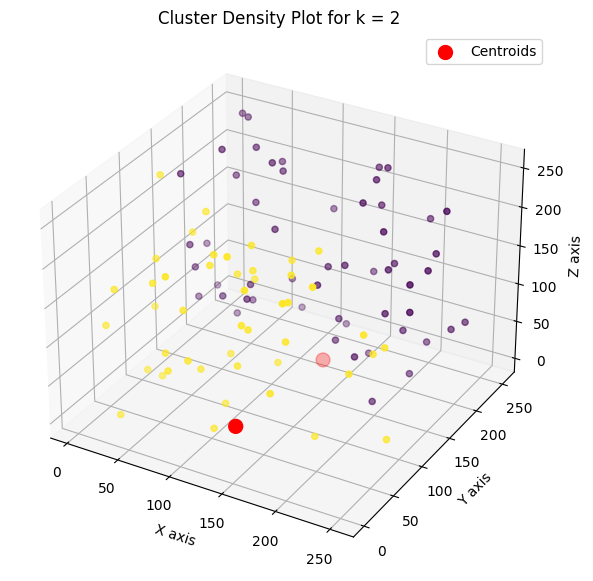

In [234]:
# visualizing the clusters in a density plot
x = df['x']
y = df['y']
z = df['z']  
cluster_labels = df['k-means for k = 2']  
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red', s=100, label='Centroids')


# Scatter plot with color coded by cluster labels
scatter = ax.scatter(x, y, z, c=cluster_labels, cmap='viridis')

# Set labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Cluster Density Plot for k = 2')

plt.legend()
plt.show()

Checking for a possibly better clustering nature for k = 4 :

In [235]:
kmeans = KMeans(n_clusters = 4, n_init = 10)

In [236]:
kmeans.fit(df[['x', 'y', 'z']])

KMeans(n_clusters=4, n_init=10)

In [237]:
# Adding a new coliumn in dataframe df for k = 4
df['k-means for k = 4'] = kmeans.labels_

In [238]:
df

,IP Address,x,y,z,extra,k-means for k = 2,k-means for k = 4
0,152.174.74.159,152.0,174.0,74.0,159.0,0,2
1,176.41.145.221,176.0,41.0,145.0,221.0,1,0
2,205.33.230.180,205.0,33.0,230.0,180.0,1,0
3,34.74.173.159,34.0,74.0,173.0,159.0,1,0
4,244.125.152.220,244.0,125.0,152.0,220.0,0,2
...,...,...,...,...,...,...,...
95,102.255.148.139,102.0,255.0,148.0,139.0,0,3
96,2.224.27.40,2.0,224.0,27.0,40.0,0,1
97,246.198.81.102,246.0,198.0,81.0,102.0,0,2
98,20.158.102.161,20.0,158.0,102.0,161.0,0,1


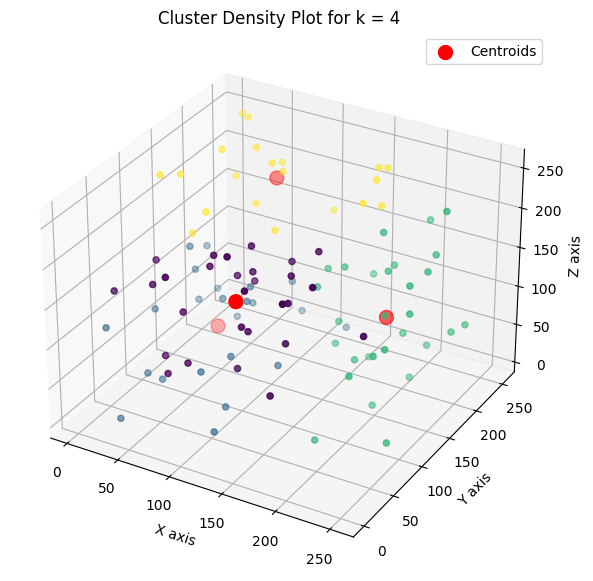

In [239]:
# visualizing the clusters in a density plot for k = 4
x = df['x']
y = df['y']
z = df['z']  
cluster_labels = df['k-means for k = 4']  
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='o', c='red', s=100, label='Centroids')


# Scatter plot with color coded by cluster labels
scatter = ax.scatter(x, y, z, c=cluster_labels, cmap='viridis')

# Set labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Cluster Density Plot for k = 4')

plt.legend()
plt.show()

Testing the cluster (k = 4) for new incoming IP Addresses : 

In [240]:
# random_ip_addresses.csv file has 100 sample random IPv4 Addresses to test which cluster they belong to
csv_file_to_test = "random_ip_addresses.csv"

# Read the CSV file into a pandas Data frame dframe
dframe = pd.read_csv(csv_file_to_test)

In [241]:
dframe

,IP Address,x,y,z
0,34.81.72.54,34,81,72
1,237.175.53.115,237,175,53
2,210.118.187.27,210,118,187
3,63.83.77.93,63,83,77
4,154.99.171.217,154,99,171
...,...,...,...,...
95,76.118.116.128,76,118,116
96,98.229.33.138,98,229,33
97,60.250.28.66,60,250,28
98,202.148.65.75,202,148,65


In [242]:
# Calculate distances between new data and centroids
dframe_pts = dframe[["x", "y", "z"]]
dist = cdist(dframe_pts, centroids)

# Find minimum distance for each new data point
min_dist = dist.min(axis = 1)

# Define a threshold for minimum distance
boundary = 100

# Identify potential intrusions based on low minimum distance
possible_intrusions = dframe.loc[min_dist > boundary]

In [243]:
# getting the x, y and z coordinates of the IP Addresses from the random_ip_addresses.csv file
dframe_pts

,x,y,z
0,34,81,72
1,237,175,53
2,210,118,187
3,63,83,77
4,154,99,171
...,...,...,...
95,76,118,116
96,98,229,33
97,60,250,28
98,202,148,65


In [244]:
# printing the distance of each Data Point to all 4 clusters
dist

array([[142.24535518,  58.60417993, 191.95387811, 191.29763459],
       [208.11335768, 184.76569744,  67.56464294, 229.23238209],
       [110.44112038, 200.36991311,  86.8149932 , 151.1382976 ],
       [121.80088406,  53.76856518, 164.5730577 , 180.97039813],
       [ 59.21291787, 152.43406954,  99.2852818 , 126.95308188],
       [209.84813812, 113.80367302, 204.90783868, 123.95840028],
       [139.20010648, 177.2507862 , 236.11309741, 118.71556343],
       [107.21852685, 155.71913789, 115.46195795, 223.15170849],
       [222.15267835, 111.92686817, 127.32167357, 190.05390025],
       [ 79.0159907 ,  83.00742445, 143.67605424, 149.90158438],
       [182.10816546, 182.00947752, 184.8769813 ,  25.46144144],
       [130.01768424, 142.86316771, 118.85857262, 233.90358056],
       [ 98.53076931, 136.28476387,  68.93511399, 178.42809476],
       [177.73683897, 194.19380143,  90.31906055, 114.60010907],
       [129.40864814, 201.41276543, 134.27576466, 252.86910646],
       [183.18616117, 239

In [245]:
# checking for all the Data points, the distance which is minimum
min_dist

array([ 58.60417993,  67.56464294,  86.8149932 ,  53.76856518,
        59.21291787, 113.80367302, 118.71556343, 107.21852685,
       111.92686817,  79.0159907 ,  25.46144144, 118.85857262,
        68.93511399,  90.31906055, 129.40864814,  98.30449674,
        94.1129166 ,  77.14706503,  88.93924351,  73.89827709,
        79.06292742, 109.96350142,  41.14467995,  73.16638211,
        59.262003  ,  84.01671596,  54.75293534,  26.21230627,
        84.97830606,  73.72019599,  72.61163753,  61.06032221,
        76.64637824,  85.20495878, 124.4356905 ,  70.97553653,
        54.32610609,  66.38759297, 125.48988316,  89.28900708,
        44.40253371,  56.25537571,  98.34014948,  58.01849324,
       116.15801737,  87.21401837,  82.68606291, 137.77968309,
        91.32344521,  78.88435251,  57.83843878,  41.73160416,
        99.94591037, 120.87817296, 124.69016059,  61.54520696,
       170.74021891,  43.93842282,  60.89708825,  70.58347389,
       116.269056  ,  66.99329876, 113.12015578, 130.98

In [246]:
cluster_labels = np.argmin(dist, axis = 1)

IP = 'IP Address'

# Printing data point - cluster assignments
for i in range(len(dframe_pts)):
  ip_address = dframe.loc[i, IP]  # Accessing the IP address column which has all hthe IPv4 test addresses using index and column name
  print(f"IP Address: {ip_address}    belongs to cluster : {cluster_labels[i]}")

IP Address: 34.81.72.54    belongs to cluster : 1
IP Address: 237.175.53.115    belongs to cluster : 2
IP Address: 210.118.187.27    belongs to cluster : 2
IP Address: 63.83.77.93    belongs to cluster : 1
IP Address: 154.99.171.217    belongs to cluster : 0
IP Address: 8.212.124.222    belongs to cluster : 1
IP Address: 8.98.225.237    belongs to cluster : 3
IP Address: 185.48.84.104    belongs to cluster : 0
IP Address: 122.222.38.84    belongs to cluster : 1
IP Address: 84.82.118.243    belongs to cluster : 0
IP Address: 68.212.222.231    belongs to cluster : 3
IP Address: 178.57.55.96    belongs to cluster : 2
IP Address: 179.95.106.57    belongs to cluster : 2
IP Address: 186.214.179.141    belongs to cluster : 2
IP Address: 225.27.92.28    belongs to cluster : 0
IP Address: 247.183.196.251    belongs to cluster : 2
IP Address: 123.96.254.160    belongs to cluster : 0
IP Address: 78.64.117.218    belongs to cluster : 0
IP Address: 26.72.115.181    belongs to cluster : 1
IP Address

In [247]:
# checking for Data points with possible intrusion
possible_intrusions

,IP Address,x,y,z
5,8.212.124.222,8,212,124
6,8.98.225.237,8,98,225
7,185.48.84.104,185,48,84
8,122.222.38.84,122,222,38
11,178.57.55.96,178,57,55
14,225.27.92.28,225,27,92
21,1.89.142.195,1,89,142
34,108.12.56.41,108,12,56
38,39.16.17.16,39,16,17
44,181.251.229.72,181,251,229


In [248]:
possible_intrusions.describe()

,x,y,z
count,29.000000,29.000000,29.000000
mean,134.793103,114.620690,115.827586
std,85.134507,93.755919,83.559675
min,1.000000,7.000000,3.000000
25%,57.000000,27.000000,39.000000
50%,178.000000,87.000000,92.000000
75%,201.000000,217.000000,218.000000
max,252.000000,252.000000,237.000000


In [249]:
# checking for all the intrusion pointst the distance from all cluster centroids
intrusion_pts = possible_intrusions[["x", "y", "z"]]
intrusion_dist = cdist(intrusion_pts, centroids)

# Find minimum distance for each possible intrusion data points and check if it is greater than the boundary value of 100 
min_dist = intrusion_dist.min(axis = 1)

In [250]:
# distance of intrusion data points
intrusion_dist

array([[209.84813812, 113.80367302, 204.90783868, 123.95840028],
       [139.20010648, 177.2507862 , 236.11309741, 118.71556343],
       [107.21852685, 155.71913789, 115.46195795, 223.15170849],
       [222.15267835, 111.92686817, 127.32167357, 190.05390025],
       [130.01768424, 142.86316771, 118.85857262, 233.90358056],
       [129.40864814, 201.41276543, 134.27576466, 252.86910646],
       [136.66705502, 109.96350142, 218.1607639 , 152.24580454],
       [124.4356905 , 131.35933919, 184.14812706, 244.74902451],
       [182.53324061, 125.48988316, 238.14132636, 272.14662408],
       [218.5942711 , 241.59743267, 152.34901494, 116.15801737],
       [137.77968309, 177.8649155 , 153.24450244, 263.99447911],
       [187.97841346, 257.319996  , 120.87817296, 170.40946277],
       [129.69535045, 240.89753801, 124.69016059, 176.4057397 ],
       [176.05323363, 191.20582443, 170.74021891, 294.20738434],
       [246.05797444, 116.269056  , 170.92279446, 190.41056956],
       [113.12015578, 262

In [251]:
# minimum distacne of intrusion data points (>100)
min_dist

array([113.80367302, 118.71556343, 107.21852685, 111.92686817,
       118.85857262, 129.40864814, 109.96350142, 124.4356905 ,
       125.48988316, 116.15801737, 137.77968309, 120.87817296,
       124.69016059, 170.74021891, 116.269056  , 113.12015578,
       130.98701544, 145.35265656, 107.75778891, 116.24399897,
       114.369855  , 104.50734424, 115.49532303, 110.29317749,
       104.03225834, 103.99129308, 107.29466696, 120.8217062 ,
       128.29569361])